# Training of Taxi-v3 Environment

In [1]:
import gymnasium as gym
import numpy as np
import random
import os
import pandas as pd

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [2]:
env = gym.make("Taxi-v3", render_mode="ansi")
s, _ = env.reset()

## Hyperparameters

In [3]:
GAMMA = 0.9  # Discount factor
ALPHA = 0.01   # Learning rate
EPSILON = 0.1 # e-greedy
EPISODES = 100_000 # Number of episodes
SAVE_EVERY = 10_000 # Save every n episodes

## Training

In [4]:
#Q[state, action] table implementation
Q = np.zeros([env.observation_space.n, env.action_space.n])

reward_list = []

for episode in range(EPISODES):
    done = False
    episode_reward = 0
    state, _ = env.reset()
    while not done:
        if random.uniform(0, 1) < EPSILON:
            action = env.action_space.sample() #Explore state space
        else:
            action = np.argmax(Q[state]) #Exploit learned values
        next_state, reward, done, _, info = env.step(action) #Invoke Gym
        next_max = np.max(Q[next_state])
        old_value = Q[state, action]
        # Q-Learning update rule
        # Compute the new Q-value with the Bellman equation
        new_value = (1 - ALPHA) * old_value + ALPHA * (reward + GAMMA * next_max)
        
        Q[state, action] = new_value
        episode_reward += reward
        state = next_state
        
    reward_list.append(episode_reward)
    if episode % SAVE_EVERY == 0:
        clear_output(wait=True)
        mean = np.mean(reward_list[-1000:])
        print("Episode {}, Mean Reward of last 1000 Episodes: {}".format(episode, mean))

        df = pd.DataFrame(Q)
        df.to_csv('stats'+os.sep+'Q_base.csv')
        df = pd.DataFrame(reward_list)
        df.to_csv('stats'+os.sep+'reward_list_base.csv')
        del df

Episode 100000, Mean Reward of last 1000 Episodes: 2.676


## Results

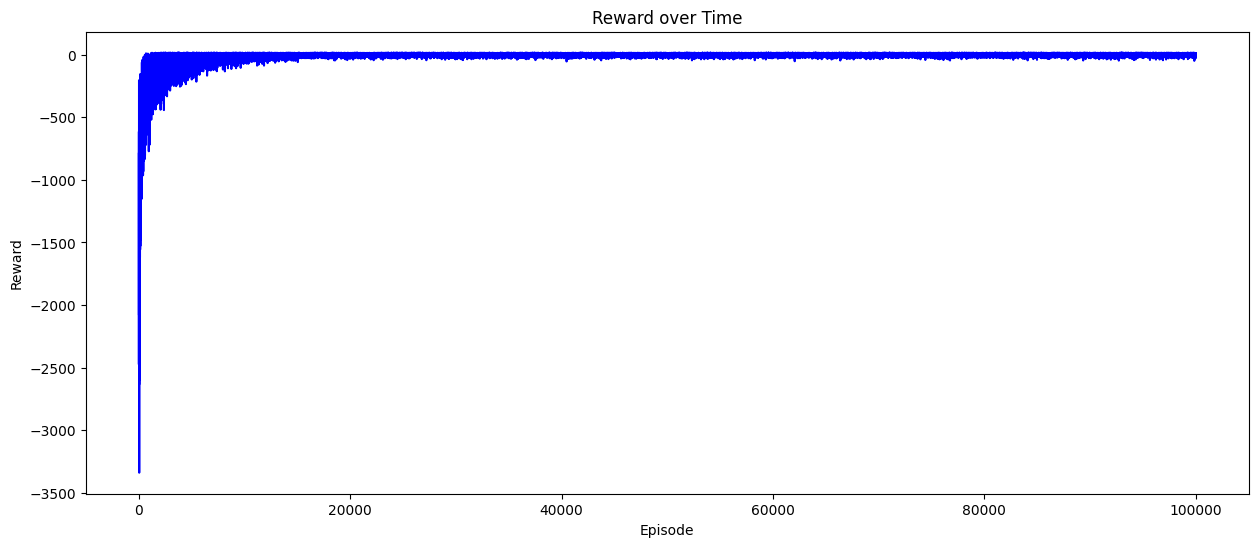

In [5]:
plt.figure(figsize=(15,6))
plt.title("Reward over Time")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot(reward_list, color='blue', label='Reward per Episode')
plt.show()

## Show an episode

In [6]:
total_penalties, total_rewards = 0, 0

state, _ = env.reset()
epochs, penalties, reward = 0, 0, 0
done = False
while not done and epochs < 100:
    action = np.argmax(Q[state])
    print(env.render())
    state, reward, done, _, info = env.step(action)
    if reward < -1:
        penalties +=1
    epochs +=1
    total_rewards += reward
total_penalties += penalties

print("Timesteps taken: {}".format(epochs))
print("Penalties incurred: {}".format(penalties))
print("Episode Reward: {}".format(total_rewards))

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+


+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)

+---------+
|R: | : :G|
| : | : : |
| : : : : |
|_| : | : |
|Y

## Execute 100 episodes and show the average reward

In [8]:
total_epochs, total_penalties, total_rewards = 0, 0, 0
ep = 1000
df = pd.DataFrame(columns=['Episode', 'Timesteps', 'Penalties', 'Rewards'])

for i in range(ep):
    state, _ = env.reset()
    epochs, penalties, reward, cum_reward = 0, 0, 0, 0
    done = False
    while not done and epochs < 100:
        action = np.argmax(Q[state])
        
        state, reward, done, _, info = env.step(action)
        if reward < -1:
            penalties +=1
        epochs +=1
        cum_reward += reward
        
    df.loc[len(df)] = [i, epochs, penalties, cum_reward]
    
    total_rewards += cum_reward
    total_penalties += penalties
    total_epochs += epochs
    
df.to_csv('stats' +os.sep+ 'test_base.csv', index=False)

print(f"Results after {ep} episodes:")
print(f"Average timesteps per episode: {total_epochs / ep}")
print(f"Average penalties per episode: {total_penalties / ep}")
print(f"Average rewards per episode: {total_rewards / ep}")

Results after 1000 episodes:
Average timesteps per episode: 13.038
Average penalties per episode: 0.0
Average rewards per episode: 7.962
